# 首先确定torch和cuda的版本

本电脑为：材料学科楼444工位戴尔工作站7920

显卡为：quadro p620

torch版本：2.4.1
cuda版本：11.8

In [3]:
import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)

2.4.1
True
1
11.8


# 安装torch_geometric

pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.4.1+cu118.html

pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.4.1+cu118.html

pip install torch-geometric

所安装的版本为2.6.1

In [5]:
import torch_geometric
print(torch_geometric.__version__)

2.6.1


# 基本图操作

## 1.图的创建

In [ ]:
def __init__(self, x: OptTensor = None, edge_index: OptTensor = None,
             edge_attr: OptTensor = None, y: OptTensor = None,
             pos: OptTensor = None, **kwargs):

|      参数      | 说明                                                                                      |
|:------------:|:----------------------------------------------------------------------------------------|
|      x       | 节点特征矩阵，shape为[num_nodes, num_node_features]，Tensor类型                                    |
|  edge_index  | 边索引（边表），shape为[2, num_edges]，在这个包含两行的数组中，第1行与第2行中对应索引位置的值分别表示一条边的源节点和目标节点，LongTensor类型。 |
|  edge_attr   | 边特征矩阵，shape为[num_edges, num_edges_featrues]，Tensor类型                                    |
|      y       | 图级标签或节点级标签，Tensor类型                                                                     |
|     pos      | 节点的位置矩阵，shape为[num_nodes, num_dimensions]，Tensor类型                                      |
|   **kwargs   | 用户自定义的额外属性，传入格式需为attr_name=attr_value                                                   |





|                     方法/属性	                      | 说明          |
|:-----------------------------------------------:|:------------|
|         num_node_features/num_features	         | 图节点数特征（维度）数 |
|               num_edge_features	                | 图中边的特征（维度）数|
|                      keys	                      | 图属性名列表|
|                   num_edges	                    | 图边数|
|                   num_nodes	                    | 图节点数|
|         is_directed()/is_undirected()	          | 是否为有向图/无向图|
|                    is_cuda	                     | 图是否存储在GPU上|
|     has_self_loops()/contains_self_loops()	     | 图中节点是否包含自环|
| has_isolated_nodes()/contains_isolated_nodes()	 | 图中是否包含孤立节点|
|                   to(device)	                   | 将图实例放置到指定的设备（GPU或CPU）上|
|                    clone()	                     | 对图进行深拷贝|

## 2.演示示例

Data(x=[5, 2], edge_index=[2, 12])


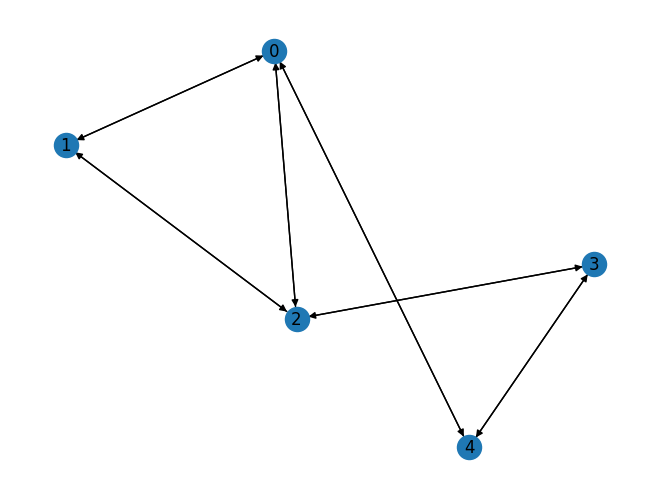

In [46]:
import torch_geometric.data as data
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

# 邻接矩阵
# 首先创建一个包含5个顶点、12条边的无向图
edge_index = torch.LongTensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
                               [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0]])
x = torch.ones(5, 2)
g = data.Data(edge_index=edge_index, x=x)
print(g)
"""
Data(edge_index=[2, 12], x=[5, 2])
"""
# 转换为networkx格式的图并可视化
G = to_networkx(g)
nx.draw(G, with_labels=G.nodes)
plt.show()


对上述创建的Data对象应用2.2节介绍的部分方法实例代码如下：

In [47]:
print(g.num_nodes, g.num_edges)
# 5 12
print(g.keys)
# ['x', 'edge_index']
print(g.num_node_features)
# 2
print(g.is_undirected())
# True
print(g.has_isolated_nodes())
# False


5 12
<bound method BaseData.keys of Data(x=[5, 2], edge_index=[2, 12])>
2
True
False


In [48]:
torch.save(g, "temp/data.pt")
g = torch.load("temp/data.pt")
print(g)
# [Data(edge_index=[2, 12], x=[5, 2])]


Data(x=[5, 2], edge_index=[2, 12])


C:\Users\Dell\AppData\Local\Temp\ipykernel_19036\3047565764.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  g = torch.load("temp/data.pt")


# 进阶图操作
## 1.度的计算
通过degree(index, num_nodes=None)方法可以计算图中节点的度，其中：

index：edge_index中的两个维度中任意一个

num_nodes：节点的数量，可选参数

In [49]:
from torch_geometric.utils import degree as degree
print(g)
print(degree(g.edge_index[0]))
# tensor([3., 2., 3., 2., 2.])

print(degree(edge_index[1]))
# tensor([3., 2., 3., 2., 2.])


Data(x=[5, 2], edge_index=[2, 12])
tensor([3., 2., 3., 2., 2.])
tensor([3., 2., 3., 2., 2.])


# 2.自环的添加与删除

自环指节点指向自身的边。在utils中处理自环的方法包括：

contains_self_loops(edge_index)：判断图中节点是否包含自环。

remove_self_loops(edge_index)：删除图中所有的自环。

add_self_loops(edge_index)：为图中的节点添加自环，对于有自环的节点，它会再为该节点添加一个自环。

add_remaining_self_loops：为图中还没有自环的节点添加自环。

In [51]:
from torch_geometric.utils import contains_self_loops, remove_self_loops, add_self_loops, add_remaining_self_loops

print(contains_self_loops(g.edge_index))
# False

edge_index, _ = add_self_loops(g.edge_index)
print(edge_index)
"""
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 0, 1, 2, 3, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0, 0, 1, 2, 3, 4]])
"""

edge_index, _ = add_remaining_self_loops(edge_index)
print(edge_index)
"""
没有添加新的自环
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 0, 1, 2, 3, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0, 0, 1, 2, 3, 4]])
"""

edge_index, _ = remove_self_loops(edge_index)
print(edge_index)
"""
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0]])
"""




False
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 0, 1, 2, 3, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0, 0, 1, 2, 3, 4]])
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4, 0, 1, 2, 3, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0, 0, 1, 2, 3, 4]])
tensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],
        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0]])


'\ntensor([[0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 4, 4],\n        [1, 2, 4, 0, 2, 1, 0, 3, 2, 4, 3, 0]])\n'

## 2.子图的提取
utils中提供了若干方法用来在图中提取子图。

subgraph(subset, edge_index)：根据给定的图节点集合subset来抽取图中包含这些节点的子图。

k_hop_subgraph(node_idx, num_hops, edge_index)：提取给定节点集node_idx能经过num_hops跳到达的所有节点组成的子图（包括node_idx本身）。

sub_graph方法示例代码：


[0, 1, 2]


E:\anaconda3\envs\pytorch\lib\site-packages\torch_geometric\data\storage.py:452: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


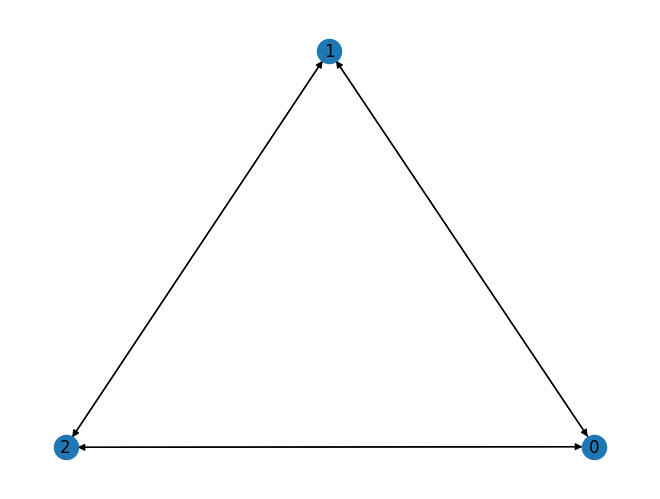

In [52]:
from torch_geometric.utils import subgraph
def draw(edge_index):
    graph = data.Data(edge_index=edge_index)
    graph = to_networkx(graph)
    print(graph.nodes)
    nx.draw(graph, with_labels=graph.nodes)
    plt.show()

edge_index, _ = subgraph(subset=torch.LongTensor(
    [0, 1, 2]), edge_index=g.edge_index)
draw(edge_index)


k_hop_subgraph方法的示例代码如下所示：

In [54]:
from torch_geometric.utils import k_hop_subgraph

g = k_hop_subgraph(
    node_idx=[0], num_hops=1, edge_index=g.edge_index)
print(g)
"""
(tensor([0, 1, 2, 4]), tensor([[0, 0, 0, 1, 1, 2, 2, 4],
        [1, 2, 4, 0, 2, 1, 0, 0]]), tensor([0]), tensor([ True,  True,  True,  True,  True,  True,  True, False, False, False,
        False,  True]))
"""

(tensor([0, 1, 2, 4]), tensor([[0, 0, 0, 1, 1, 2, 2, 4],
        [1, 2, 4, 0, 2, 1, 0, 0]]), tensor([0]), tensor([ True,  True,  True,  True,  True,  True,  True, False, False, False,
        False,  True]))


'\n(tensor([0, 1, 2, 4]), tensor([[0, 0, 0, 1, 1, 2, 2, 4],\n        [1, 2, 4, 0, 2, 1, 0, 0]]), tensor([0]), tensor([ True,  True,  True,  True,  True,  True,  True, False, False, False,\n        False,  True]))\n'

## 4.转化为无向图
通过to_undirected(edge_index)可以将一个图转换为无向图：

In [55]:
from torch_geometric.utils import to_undirected
edge_index = torch.LongTensor([[0, 0], [1, 2]])
edge_index = to_undirected(edge_index)
print(edge_index)
"""
tensor([[0, 0, 1, 2],
        [1, 2, 0, 0]])
"""


tensor([[0, 0, 1, 2],
        [1, 2, 0, 0]])


'\ntensor([[0, 0, 1, 2],\n        [1, 2, 0, 0]])\n'